## Location Convert

- This notebook convert `latitude` and `longitude` coordinates to `neighberhood` name in Pittsburgh
- The data not in Pittsburgh will be deleted

### Step 1

- Import packages
    - `pandas`
    - `geopandas`
- Use `pip install geopandas` to install if needed
- Load dataset file
- Check the first `10` data to make sure loading correctly

In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

rest_df = pd.read_csv('../../data_cleaned/assets/restaurants.csv')
print("Number of restaurant:", len(rest_df))
print(rest_df[['latitude', 'longitude']].head(10))

Number of restaurant: 3924
    latitude  longitude
0  40.305110 -79.976298
1  40.445871 -79.993547
2  40.366054 -80.106407
3  40.600047 -79.761510
4  40.384166 -79.859313
5  40.408769 -79.904709
6  40.540583 -80.182005
7  40.464399 -79.966289
8  40.407991 -79.943308
9  40.432405 -79.893877


### Step 2

- Initial `geopandas` function

In [47]:
# Load files from Makay's workplace

# Load shapefile
neighborhoods = gpd.read_file('../../../Makayla - 311 data analysis/Neighborhood boundaries/neighborhoods (1)/Neighborhoods_.shp')
print("Neighborhood Shapefile CRS", neighborhoods.crs)

# Create point data frame
geometry = [Point(xy) for xy in zip(rest_df['longitude'], rest_df['latitude'])]
gdf_rest_points = gpd.GeoDataFrame(
    rest_df,
    geometry=geometry,
    crs="EPSG:4326"
)

# Uniform coordinate systems
# neighborhoods = neighborhoods.to_crs(gdf_rest_points.crs)
gdf_rest_points = gdf_rest_points.to_crs(neighborhoods.crs)

# Join spaces
# how=left collect all the data and how=inner collect only in the zone
joined = gpd.sjoin(gdf_rest_points, neighborhoods, how='inner', predicate='within')

# print(neighborhoods.columns)
print(joined[['name', 'hood']].head(10))
joined[['hood']].to_csv('../../data_cleaned/restaurants.csv', index=False)

Neighborhood Shapefile CRS EPSG:2272
                                                 name  \
1             AC Hotel Level 7 Kitchen & Rooftop Bar    
7   A Sweet Boutique by Bella Christie & Lilâ Zâs   
8                                            61Z Cafe   
11                    AFC Sushi @ Children's Hospital   
12                   A's 2's / Ace's & Deuce's Lounge   
14                                   A Taste Of India   
17                                         941 Saloon   
19                                   876 Island Spice   
20                                   802 Bean Company   
21                   77 Cafe' / Guckenheimer Services   

                         hood  
1              Strip District  
7         Lower Lawrenceville  
8                   Hazelwood  
11      Central Lawrenceville  
12                      Bluff  
14                 Bloomfield  
17  Central Business District  
19                 East Hills  
20                  Brookline  
21           So

### Step 3

- Draw a graph to see the disturbution of data points

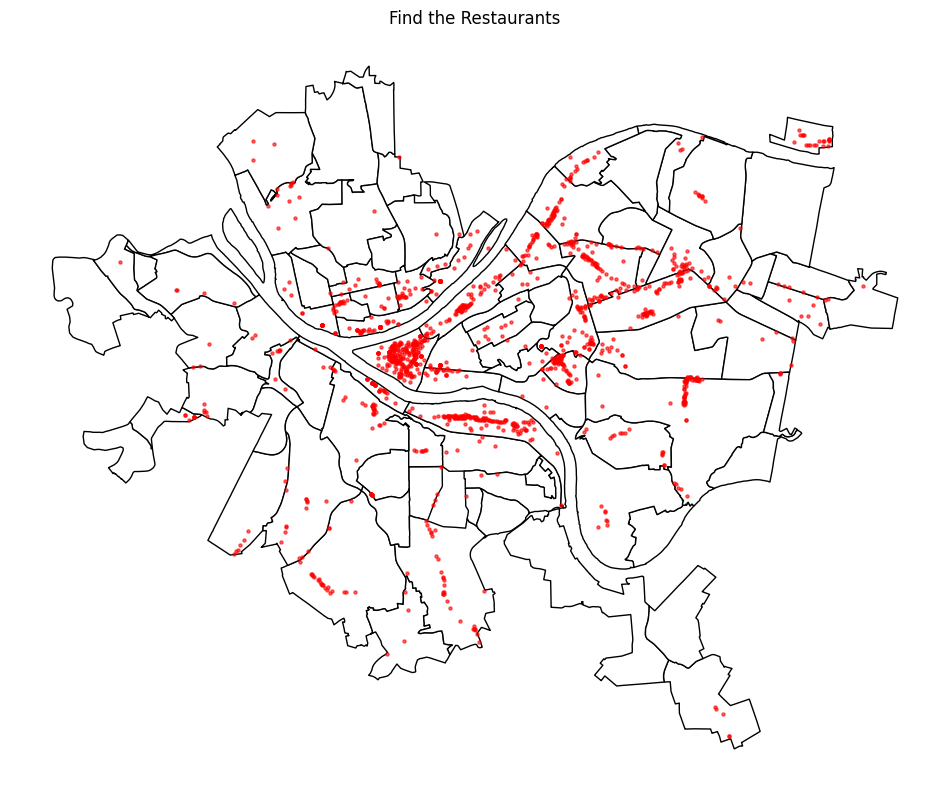

In [48]:
figure, ax = plt.subplots(figsize=(12, 12))
neighborhoods.plot(ax=ax, color='white', edgecolor='black')
joined.plot(ax=ax, markersize=5, color='red', alpha=0.6)
plt.title("Find the Restaurants")
plt.axis('off')
plt.show()

### Step 4

- Batch process all the datasets

                                                 name  \
1             AC Hotel Level 7 Kitchen & Rooftop Bar    
7   A Sweet Boutique by Bella Christie & Lilâ Zâs   
8                                            61Z Cafe   
11                    AFC Sushi @ Children's Hospital   
12                   A's 2's / Ace's & Deuce's Lounge   
14                                   A Taste Of India   
17                                         941 Saloon   
19                                   876 Island Spice   
20                                   802 Bean Company   
21                   77 Cafe' / Guckenheimer Services   

                         hood  
1              Strip District  
7         Lower Lawrenceville  
8                   Hazelwood  
11      Central Lawrenceville  
12                      Bluff  
14                 Bloomfield  
17  Central Business District  
19                 East Hills  
20                  Brookline  
21           South Side Flats  


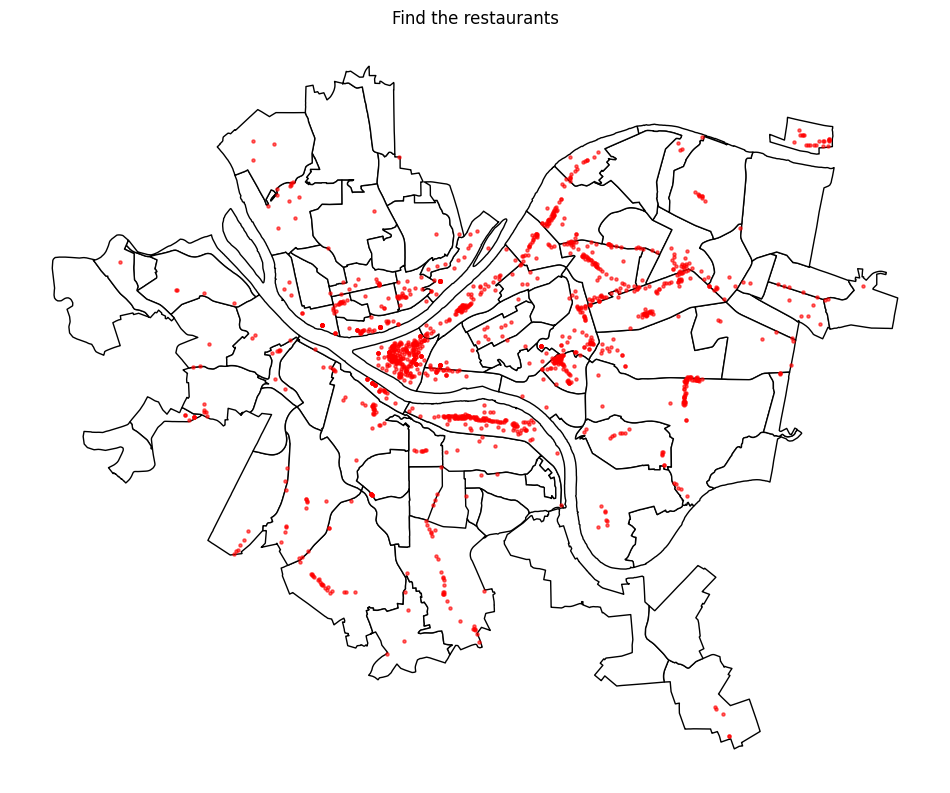

                                   name                       hood
0              ADDA Coffee & Tea House                   Shadyside
1                             61 C Cafe        Squirrel Hill South
2                      STARBUCKS COFFEE              North Oakland
3                      STARBUCKS COFFEE        Squirrel Hill South
5                  Pasha Coffee Lounge                   Shadyside
6              The Coffee Tree Roasters        Squirrel Hill South
8              21st Street Coffee & Tea  Central Business District
11  ADDA Coffee & Tea House / Northside             Allegheny West
16             The Coffee Tree Roasters                  Shadyside
17                Arriviste Coffee Bar                   Shadyside


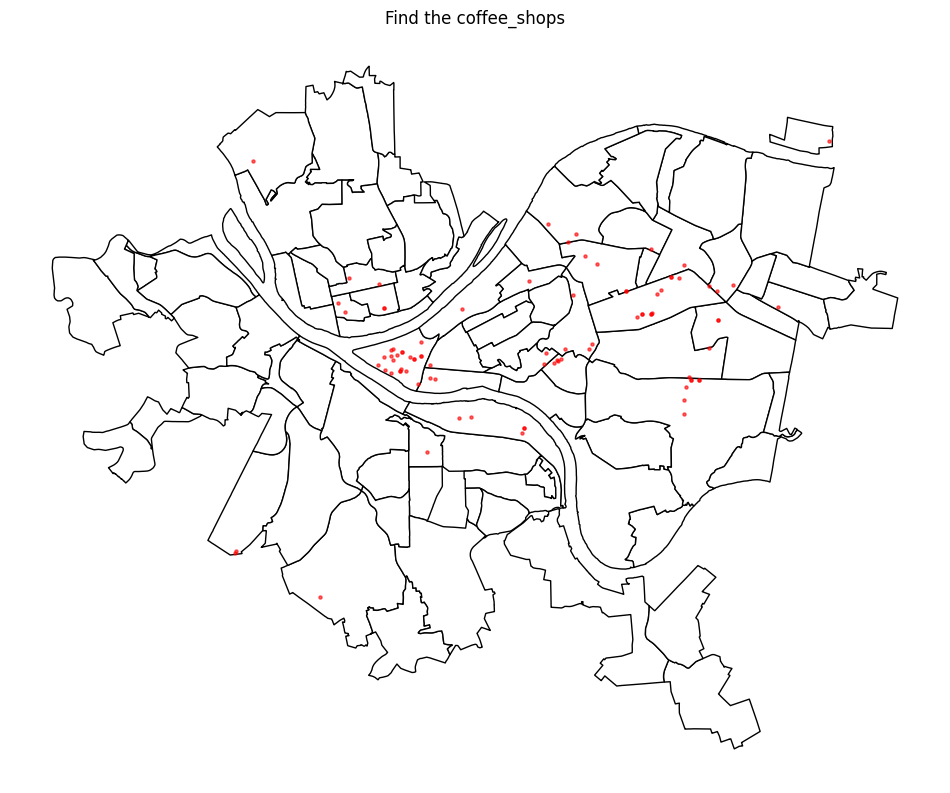

                               name                 hood
9   Donatelli's Italian Food Center           Bloomfield
10              East End Food Co-Op   Point Breeze North
11                      Food Shoppe  Squirrel Hill North
15                    Bombay Market        North Oakland
36                  Giant Eagle #17            Shadyside
42                  Giant Eagle #38  Squirrel Hill South
46                  Giant Eagle #61     South Side Flats
48                  Giant Eagle #63           Greenfield
51                  Giant Eagle #65     Brighton Heights
54                  Giant Eagle #74            Ridgemont


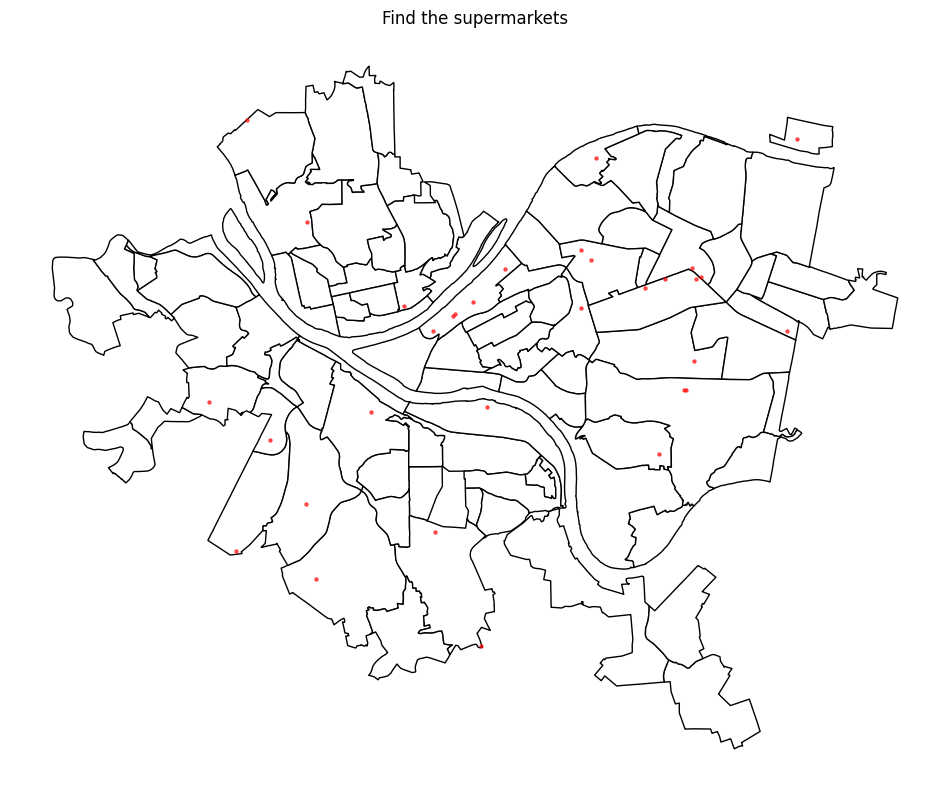

                                                 name                   hood
0                    Untitled (Ben Grubb) (Ben Grubb)          Highland Park
1   Time Travelers (Edith Abeyta & Sandy Kessler K...              Hazelwood
3         Residents of Schenley Park (Nicole Reading)    Squirrel Hill South
4                               Caves (Randi Stewart)    Squirrel Hill South
5                      Reflective Pods (Saige Baxter)          Regent Square
6               Manimal Friends (Ramiro Davaro-Comas)            Perry North
7   Stars, Sun, and Planets with Spaceships! (Sand...            Perry North
8                       Color Beechview (Lori Hepner)              Beechview
9                  Home Court Advantage (Janel Young)            Beltzhoover
10                  Spring Hill Mosaic (Linda Wallen)  Spring Hill-City View


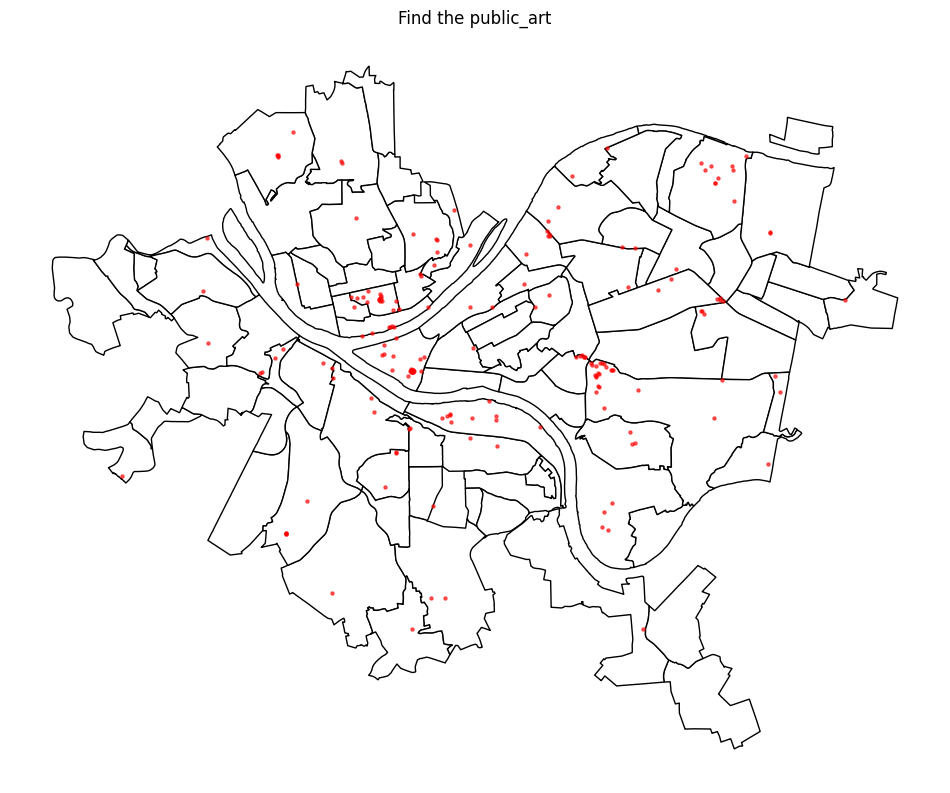

                                                 name  \
1                    FORT PITT MUSEUM AND BLOCK HOUSE   
5      CLAYTON AT THE FRICK ART AND HISTORICAL CENTER   
6                  CARNEGIE MUSEUM OF NATURAL HISTORY   
7                              CARNEGIE MUSEUM OF ART   
9                                  ANDY WARHOL MUSEUM   
21                                  PHOTO ANTIQUITIES   
22                            STEPHEN FOSTER MEMORIAL   
23                        PITTSBURGH CHILDRENS MUSEUM   
27  PITTTSBURGH THEOLOGICAL SEMINARY: BIBLELAND MU...   
34                                   MATTRESS FACTORY   

                         hood  
1   Central Business District  
5                Point Breeze  
6               North Oakland  
7               North Oakland  
9                 North Shore  
21             East Allegheny  
22              North Oakland  
23           Allegheny Center  
27               East Liberty  
34          Central Northside  


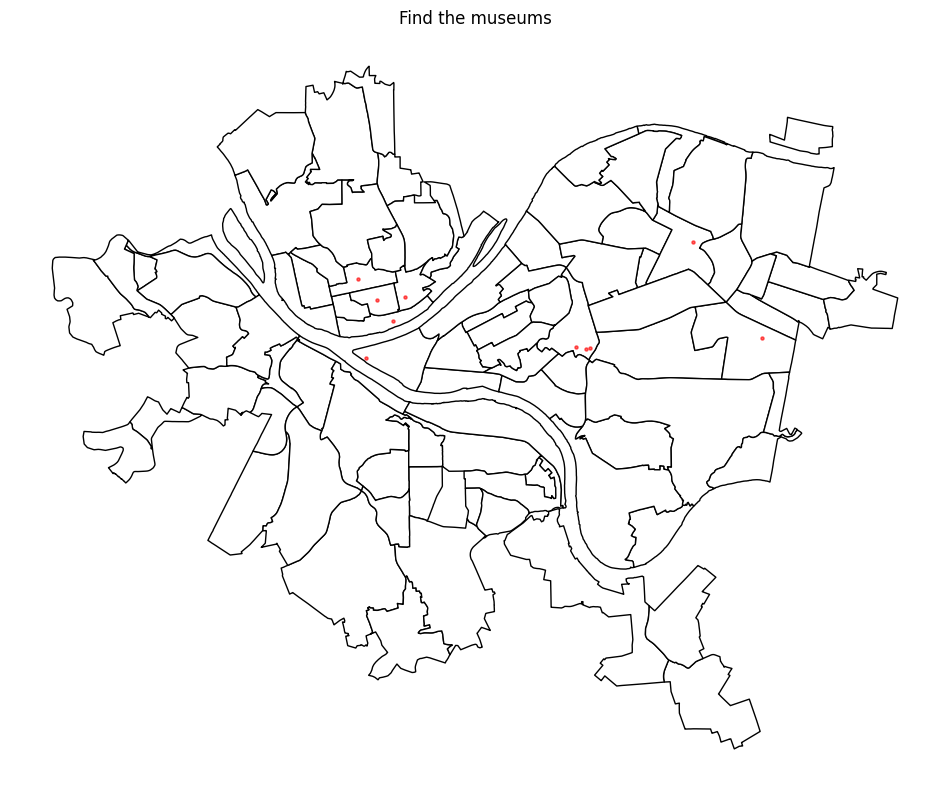

                       name                   hood
0           CARRICK LIBRARY                Carrick
1     LAWRENCEVILLE LIBRARY  Central Lawrenceville
3         Allegheny Library      Central Northside
4         ALLEGHENY LIBRARY      Central Northside
9         BEECHVIEW LIBRARY              Beechview
11        BROOKLINE LIBRARY              Brookline
13        Beechview Library              Beechview
17     EAST LIBERTY LIBRARY           East Liberty
20  Homewood Branch Library         Homewood South
21        Brookline Library              Brookline


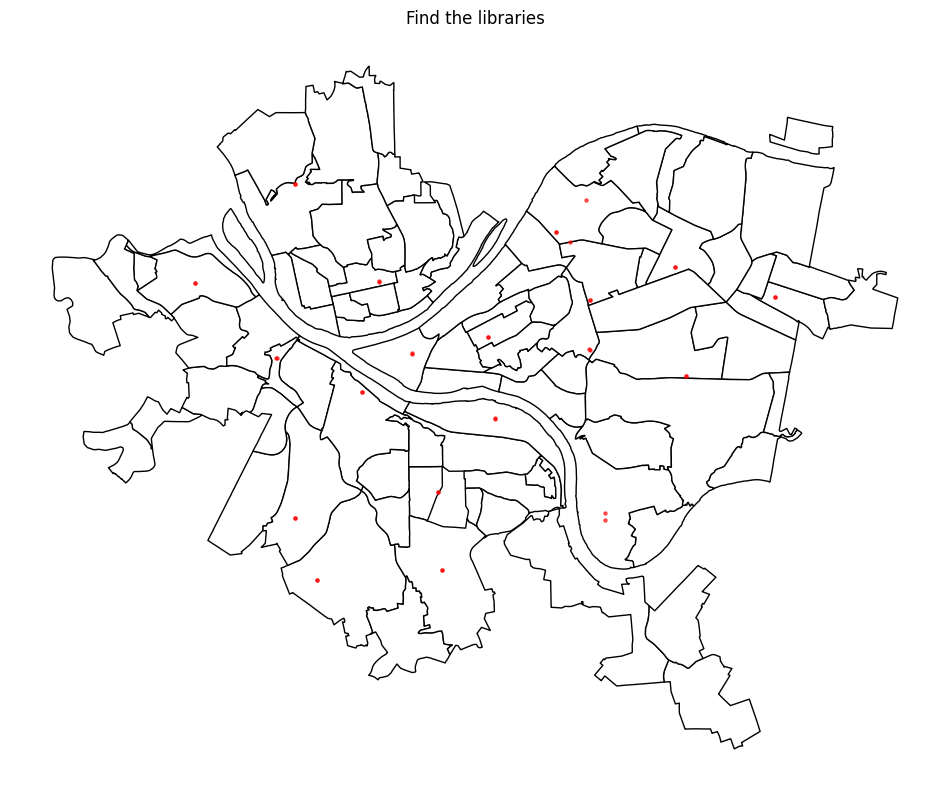

                                                name                 hood
0           Armstrong Playground (Play Area 5 to 12)     South Side Flats
1                        Fineview Playground (Whirl)             Fineview
2          Frick Beechwood Playground (Swing 2 Bays)  Squirrel Hill South
3                Grandview Playground (Swing 2 Bays)            Allentown
4        Lincoln Place Playground (Play Area 2 to 5)        Lincoln Place
5            Marmaduke Playground (Play Area 2 to 5)     Brighton Heights
6         Marmaduke Playground (Spring Toy - Turtle)     Brighton Heights
7              Mutual Playground (Play Area 5 to 12)             Sheraden
8  Robert E. WIlliams Playground (Spring Toy - Fi...           Upper Hill
9               Schenley Anderson Playground (Slide)  Squirrel Hill South


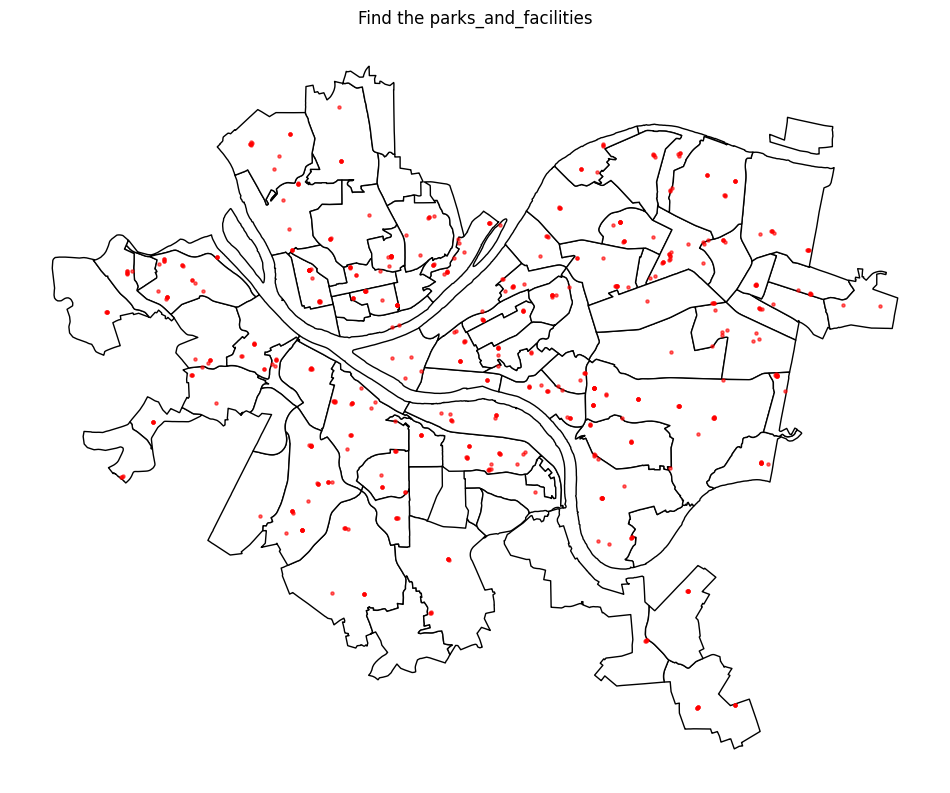

                                                 name                 hood
4   SOCIAL ASSOCIATION FOR THE PITTSBURGH PROFESSI...     Brighton Heights
6          FIRST CATHOLIC SLOVAK UNION BRANCH NO. 159     South Side Flats
8                    JAMES A GARFIELD REPUBLICAN CLUB   Marshall-Shadeland
20                                       206 FERNLEAF            Arlington
29                AMERICAN SERBIAN CLUB OF PITTSBURGH     South Side Flats
33  ARTER MURPHY POST NO 703 DEPT OF PA THE AMERIC...   Marshall-Shadeland
47                  B. P. O. ELKS ALLEGHENY LODGE 339       East Allegheny
51                        Ancient Order Hiberians #23  Upper Lawrenceville
56  BAVARIAN BENEFICIAL ASSN. OF WEST END PITTSBUR...              Elliott
61                BLOOMFIELD ITALIAN INDEPENDENT CLUB           Bloomfield


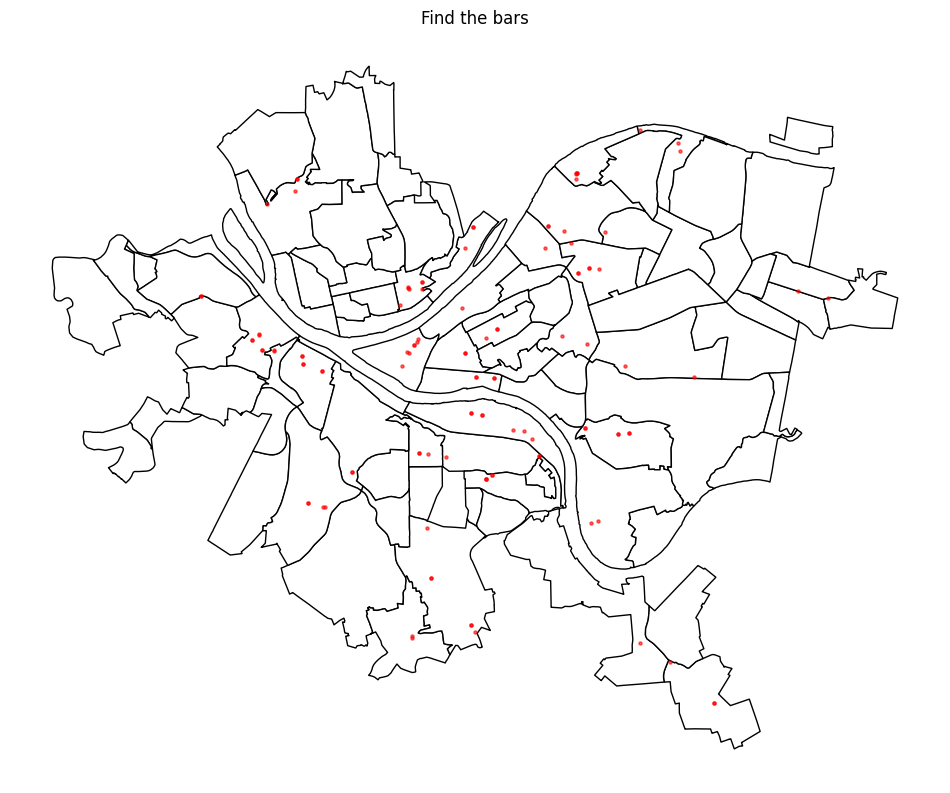

                             name                       hood
1          Woods Run Green Grocer         Marshall-Shadeland
7          Valley View Farm Stand            Stanton Heights
13    Steel Plaza Farmer's Market  Central Business District
15  Market Square Farmer's Market  Central Business District
20          Homewood Green Grocer             Homewood South
21          Homewood Fresh Access             Homewood North
22       Homewood Backyard Market             Homewood North
24             Larimer Farm Stand                    Larimer
26  Lawrenceville Farmer's Market      Central Lawrenceville
32   East Liberty Farmer's Market              Highland Park


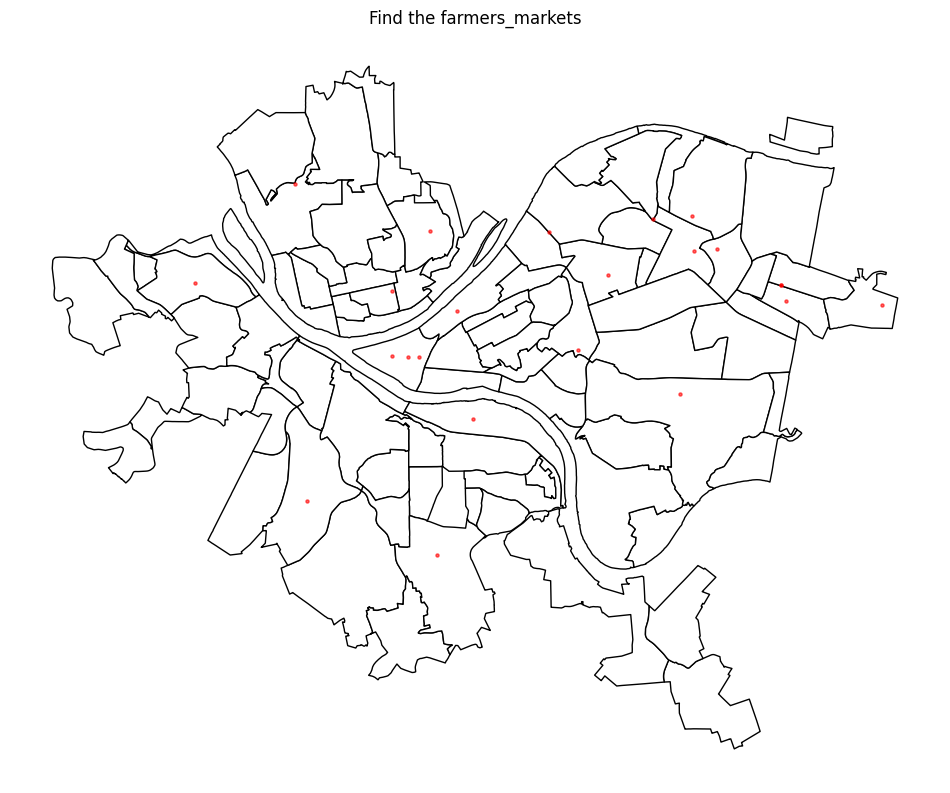

                            name                       hood
11    WOODLAND AVE AT STAYTON ST         Marshall-Shadeland
12    WOODLAND AVE AT STAYTON ST         Marshall-Shadeland
13  WOODLAND AVE AT SHADELAND AV         Marshall-Shadeland
14   WOODLAND AVE AT BRIGHTON RD         Marshall-Shadeland
15   WOODLAND AVE AT BRIGHTON RD         Marshall-Shadeland
16          WOOD ST OPP TIOGA ST                 East Hills
19  WOOD ST BTW FORBES AVE & FIF  Central Business District
22       WOOD ST AT THIRD AVE FS  Central Business District
23        ELLA ST AT LIBERTY AVE                 Bloomfield
26          WOOD ST AT SIXTH AVE  Central Business District


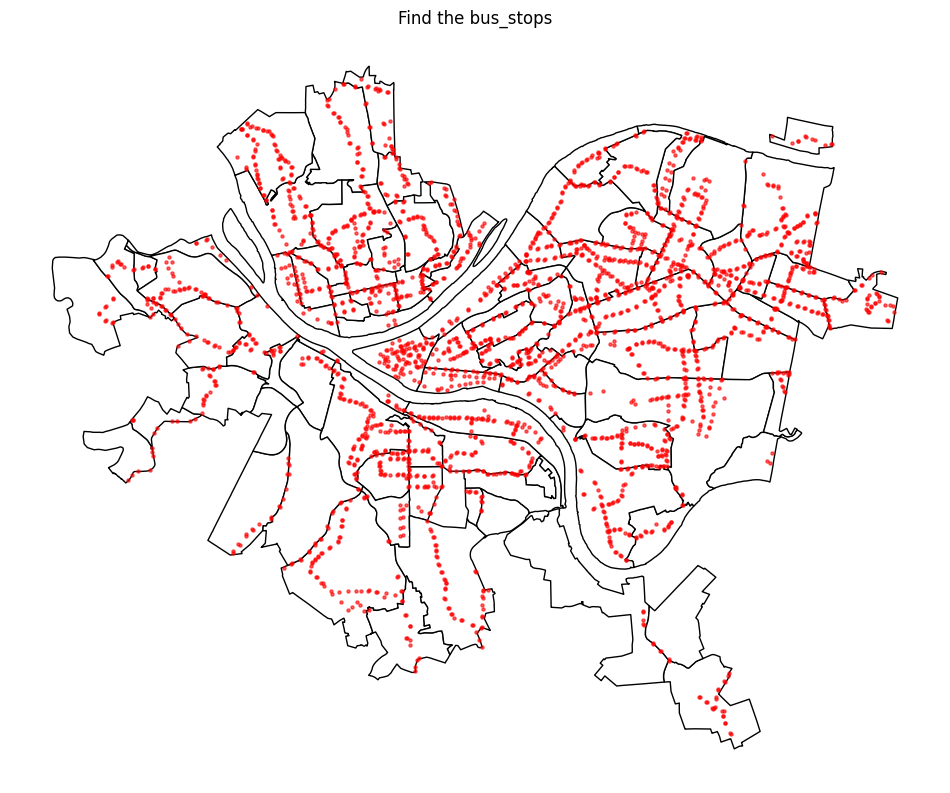

                                                 name  \
3                               American Serbian Club   
5            Community Kitchen Pittsburgh (Hazelwood)   
10       Riverview Church, on Pittsburgh's North Side   
15                          Allegheny Elks Lodge #339   
20  BETA ALPHA PSI NATIONAL COUNCIL (206 THETA CHI...   
21  AUGUST & MINNIE BONOMO TR PERPETUAL CHAR TR UA...   
23          ARNOLD D AND WINIFRED W PALMER FOUNDATION   
24  ARC OF GREATER PITTSBURGH (ALLEGHENY ARC OF GR...   
27  ALLEGHENNY COUNCIL TO IMPROVE OUT NEIGHBORHOOD...   
29  A G WINSWORTH TRUST 08284-03-0 (MASSACHUSETTS ...   

                         hood  
3            South Side Flats  
5                   Hazelwood  
10                Perry North  
15             East Allegheny  
20                      Bluff  
21           Allegheny Center  
23  Central Business District  
24           South Side Flats  
27  Central Business District  
29           Allegheny Center  


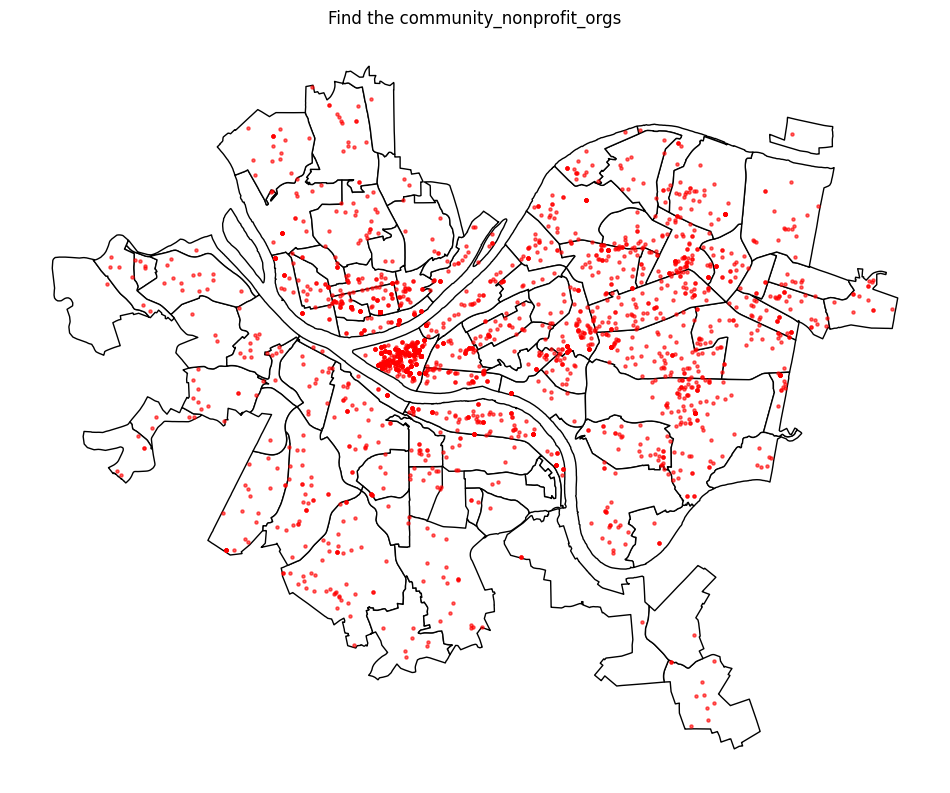

                                                 name  \
0                              Carrone Baptist Church   
2                                          Holy Ghost   
3   Corpus Christi Church /of Saint Charles Lwanga...   
4                Beechview United Presbyterian Church   
7    SAINT JOHN THE BAPTIST UKRAINIAN CATHOLIC CHURCH   
9                         SAINT CHARLES LWANGA CHURCH   
13                    SAINT LAWRENCE O'TOOLE GARFIELD   
15                SAINT JOSEPH AND SAINT JOHN VIANNEY   
16                          SAINT JOHN VIANNEY PARISH   
21                       SAINT JOHN CHRYSOSTOM CHURCH   

                        hood  
0             Homewood North  
2         Marshall-Shadeland  
3   Lincoln-Lemington-Belmar  
4                  Beechview  
7           South Side Flats  
9             Homewood South  
13                  Garfield  
15                Mt. Oliver  
16                 Allentown  
21                Greenfield  


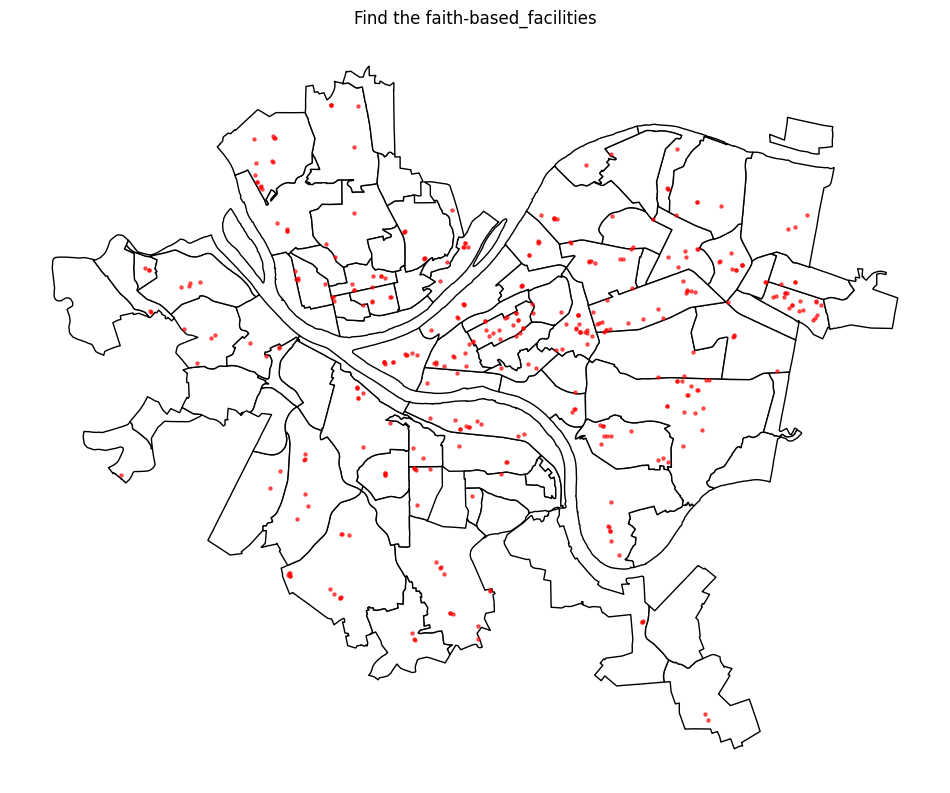

In [51]:
core_types = [
    'restaurants', 'coffee_shops', 'supermarkets', 'public_art',
    'museums', 'libraries', 'parks_and_facilities', 'bars', 'farmers_markets',
    'bus_stops', 'community_nonprofit_orgs', 'faith-based_facilities'
]

for asset_type in core_types:
    # input
    input_file_link = f'../../data_cleaned/assets/{asset_type}.csv'
    asset_df = pd.read_csv(input_file_link)

    # create point for every core
    gdf_points = gpd.GeoDataFrame(
        asset_df,
        geometry=[Point(xy) for xy in zip(asset_df['longitude'], asset_df['latitude'])],
        crs="EPSG:4326"
    )

    #Uniform
    gdf_points = gdf_points.to_crs(neighborhoods.crs)

    #Join
    joined_map = gpd.sjoin(gdf_points, neighborhoods, how='inner', predicate='within')

    #debug
    print(joined_map[['name', 'hood']].head(10))
    figure, ax = plt.subplots(figsize=(12, 12))
    neighborhoods.plot(ax=ax, color='white', edgecolor='black')
    joined_map.plot(ax=ax, markersize=5, color='red', alpha=0.6)
    plt.title("Find the " + asset_type)
    plt.axis('off')
    plt.show()

    # output
    output_file_link = f'../../data_cleaned/{asset_type}.csv'
    joined_map[['hood']].to_csv(output_file_link, index=False)